# .mp3 as input..

As I was playing with my first Colab notebook, I realized there was a problem with how I was setting up my model. The inputs I was prepared to feed in were the 518 attributes per track in the FMA dataset. In addition to be being a very complex and large input, it's not how I want the model to function.

My goal is to input an `.mp3` file and have the model output a genre prediction. I feel I have not framed my model/problem this way and will start fresh setting it up here.

## Information from Audio Files
In the FMA dataset, the 9 features are the following:

<img src="images/fma_attributes.png" />

# Extracting these features from an `.mp3` using `Librosa`
Python's `Librosa` library includes many feature extraction methods, including the following spectral features:

<img src="images/librosa-spectral-features.png" />


These features correspond ***perfectly*** with what's in the FMA dataset; they're all here:
- chroma
- tonnetz
- mfcc
 - it also computes melspectrograms, which I hope can be a cool/useful visualization
- spectral_centroid
- spectral_bandwidth
- spectral_contrast
- spectral_rolloff
- rms (root mean square energy)
- zero_crossing_rate

### Let's explore this data:
[Helpful article link here](https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d)

In [2]:
import librosa
audio_path = "audio_files/Don't Run With Pizzas.mp3"
x, sr = librosa.load(audio_path) # decodes audio file to 1D array of time series x, and sample rate of x, sr 
print(type(x), type(sr))

/Users/mkarroqe/anaconda3/lib/python3.5/importlib/_bootstrap_external.py:415: ImportWarning: Not importing directory /Users/mkarroqe/anaconda3/lib/python3.5/site-packages/virtualenvwrapper: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/Users/mkarroqe/anaconda3/lib/python3.5/importlib/_bootstrap_external.py:415: ImportWarning: Not importing directory /Users/mkarroqe/anaconda3/lib/python3.5/site-packages/sphinxcontrib: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/Users/mkarroqe/anaconda3/lib/python3.5/site-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
/Users/mkarroqe/anaconda3/lib/python3.5/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


<class 'numpy.ndarray'> <class 'int'>


In [3]:
# Playing audio
import IPython.display as ipd
ipd.Audio(audio_path)

/Users/mkarroqe/anaconda3/lib/python3.5/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/mkarroqe/anaconda3/lib/python3.5/site-packages/IPython/core/formatters.py:98: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
/Users/mkarroqe/anaconda3/lib/python3.5/site-packages/IPython/core/formatters.py:677: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
/Users/mkarroqe/anaconda3/lib/python3.5/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/Users/mkarroqe/anaconda3/lib/python3.5/site-p

/Users/mkarroqe/anaconda3/lib/python3.5/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Users/mkarroqe/anaconda3/lib/python3.5/site-packages/ipykernel/pylab/config.py:44: DeprecationWarning: InlineBackend._config_changed is deprecated: use @observe and @unobserve instead.
  def _config_changed(self, name, old, new):
/Users/mkarroqe/anaconda3/lib/python3.5/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


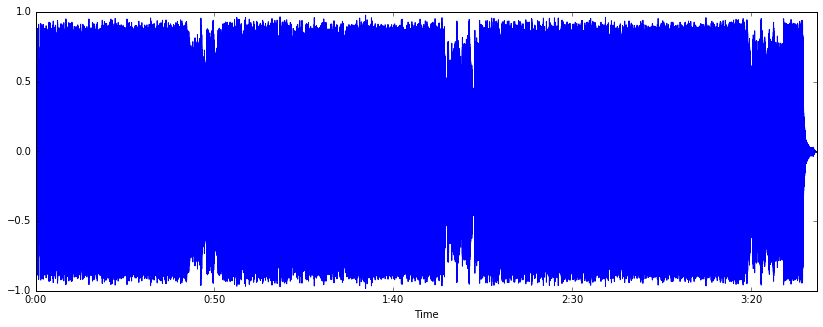

In [4]:
#display waveform 
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Spectrogram
A spectrogram shows the spectrum of frequencies of sound over time. Here's a very pleasant video explaining how to read a spectrogram: https://www.youtube.com/watch?v=_FatxGN3vAM 

Here it is for this track:

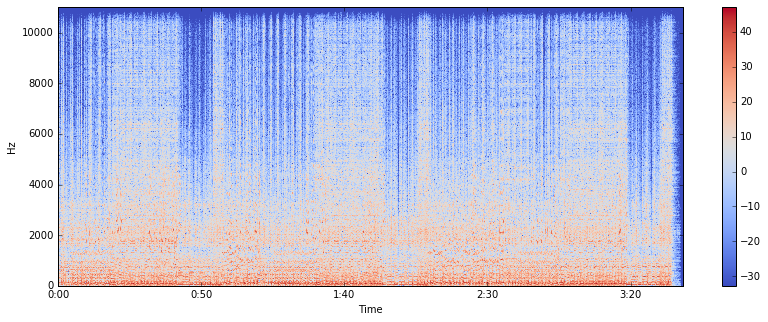

In [5]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

That's a noisy song!

### Zero-crossing rate
The rate of sign-changes along a signal; usually has higher values for highly percussive sounds (like in metal/rock)

/Users/mkarroqe/anaconda3/lib/python3.5/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


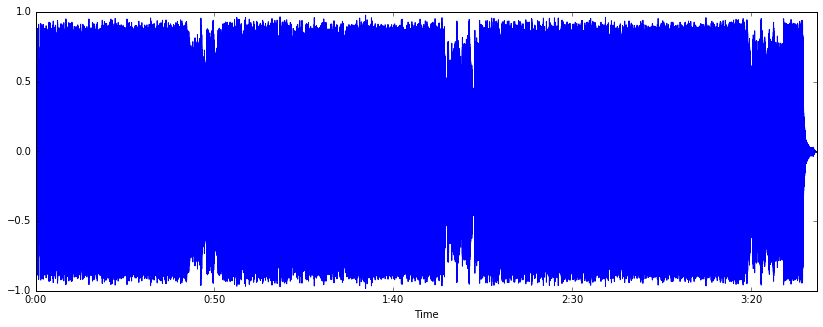

In [6]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

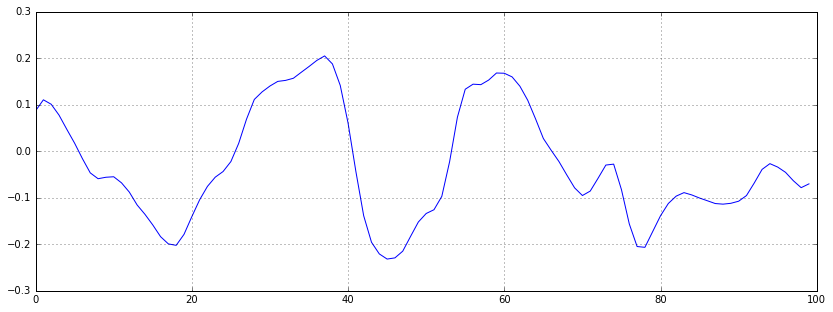

In [7]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

We can see here that the signal crosses zero 5 times in the above graph, which looks at the first 100 columns in our 1D array. It can also be calculated as follows:

In [9]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [10]:
# for entire song
zero_crossings = librosa.zero_crossings(x, pad=False)
print(sum(zero_crossings))

419596


In [13]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

5


The zero crossing rate is represented in our dataset, and I think will be a good indicator of the "roughness" of a track (as high percussion is probably more likely to be rock)

## Spectral Centroid
This feature shows where the "center of mass" for a sound is; it is the weighted mean of all present frequencies.

In [18]:
# spectral centroid
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape # shape of array with column for each frame in sample

(9402,)

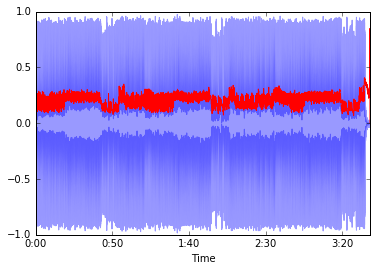

In [21]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalizing viz
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

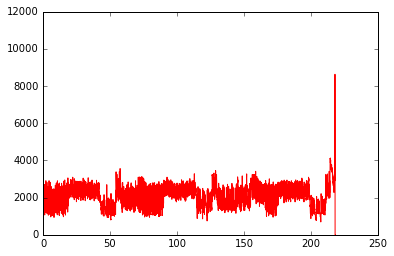

In [23]:
plt.plot(t, spectral_centroids, color='r') # without normalizing

# Mel-Frequency Cepstral Coefficient (MFCC)
These coefficients describe the "shape" of a sound signal. It can also be used to describe the timbre. Timbre, or tone is described with words like sharp, round, reedy, brassy, bright, etc.

In [26]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

(20, 9402)


The tuple above gives us the total number of MFCCs calculated (index 0) and the total number of frames available.

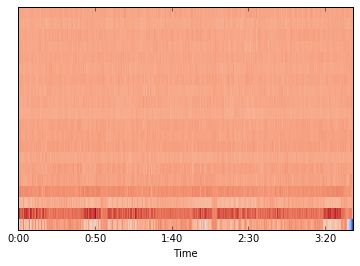

In [32]:
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

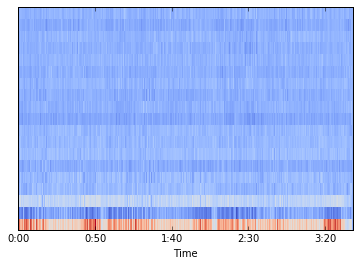

In [34]:
#Displaying  the MFCCs:
librosa.display.specshow(mfccs[1:20], sr=sr, x_axis='time')

This one is without the first feature, which contains a constant offset; it is often discarded according to [this](https://musicinformationretrieval.com/mfcc.html)